<a href="https://colab.research.google.com/github/danlegion/value-investing/blob/master/Value_Investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Value Investing Analysis**

# Glossary

- **Net Income**:  revenues minus expenses, interest, and taxes.
- **Equity**: Value of the business if it were closed
down and all its assets were sold
(assets minus liabilities). 
Amount of money that would be returned to a company’s shareholders if all of the assets were liquidated and all of the company's debt was paid off

# Imports

In [ ]:
!pip install simfin

     |████████████████████████████████| 61kB 1.8MB/s 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the main functionality from the SimFin Python API.
import simfin as sf

# Import names used for easy access to SimFin's data-columns.
from simfin.names import *

# Version of the SimFin Python API.
sf.__version__

'0.7.0'

# Config

In [ ]:
# SimFin data-directory.
sf.set_data_dir('~/simfin_data/')

# SimFin load API key or use free data.
sf.load_api_key(path='~/simfin_api_key.txt', default_key='free')

# Seaborn set plotting style.
sns.set_style("whitegrid")

# Load Datasets

In [ ]:
%%time
# Data for USA.
market = 'us'

# Annual Income Statements.
df_income = sf.load_income_banks(variant='annual', market=market)

# Annual Balancesheet Statements.
df_balance = sf.load_balance_banks(variant='annual', market=market)

#Annual Cash Flow Statements.
df_cashflow = sf.load_cashflow_banks(variant='annual', market=market)

Dataset "us-income-banks-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-balance-banks-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-cashflow-banks-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
CPU times: user 126 ms, sys: 11.6 ms, total: 137 ms
Wall time: 6.15 s


# Viewing Data

In [ ]:
# set ticker(s) to review
ticker = 'BAC'

## Moat - Big Four
Looking for 10%+ growth on the next 4 following numbers

TODO: show graphs

              Net Income       Revenue
Report Date                           
2008-12-31    4008000000   72782000000
2009-12-31    6276000000  119643000000
2010-12-31   -2238000000  110220000000
2011-12-31    1446000000   93454000000
2012-12-31    4188000000   83334000000
2013-12-31   11431000000   88942000000
2014-12-31    5520000000   85894000000
2015-12-31   15836000000   82965000000
2016-12-31   17906000000   83701000000
2017-12-31   18232000000   87352000000
2018-12-31   28147000000   91247000000


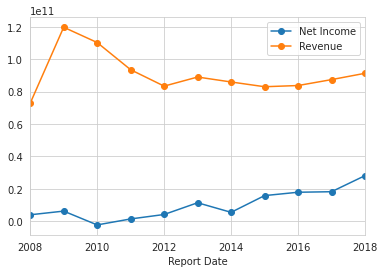

             Net Income   Revenue
Report Date                      
2008-12-31          NaN       NaN
2009-12-31     0.565868  0.643854
2010-12-31    -1.356597 -0.078759
2011-12-31    -1.646113 -0.152114
2012-12-31     1.896266 -0.108289
2013-12-31     1.729465  0.067295
2014-12-31    -0.517103 -0.034270
2015-12-31     1.868841 -0.034100
2016-12-31     0.130715  0.008871
2017-12-31     0.018206  0.043620
2018-12-31     0.543824  0.044590


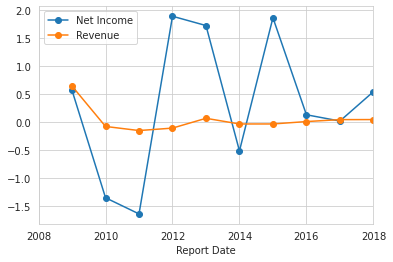

In [ ]:
# Net Income & Sales (Revenue)
iar = df_income.loc[ticker, [NET_INCOME, REVENUE]]
print(iar)
iar.plot(grid=True, marker="o")
plt.show()
print(iar.pct_change())
iar.pct_change().plot(grid=True, marker="o")
plt.show()

             Net Cash from Operating Activities
Report Date                                    
2008-12-31                           4034000000
2009-12-31                         129731000000
2010-12-31                          82541000000
2011-12-31                          64448000000
2012-12-31                         -16056000000
2013-12-31                          92817000000
2014-12-31                          30795000000
2015-12-31                          28347000000
2016-12-31                          18306000000
2017-12-31                          10403000000
2018-12-31                          39520000000


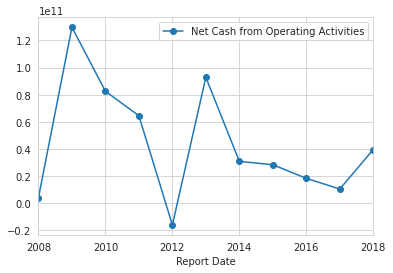

             Net Cash from Operating Activities
Report Date                                    
2008-12-31                                  NaN
2009-12-31                            31.159395
2010-12-31                            -0.363753
2011-12-31                            -0.219200
2012-12-31                            -1.249131
2013-12-31                            -6.780830
2014-12-31                            -0.668218
2015-12-31                            -0.079493
2016-12-31                            -0.354217
2017-12-31                            -0.431716
2018-12-31                             2.798904


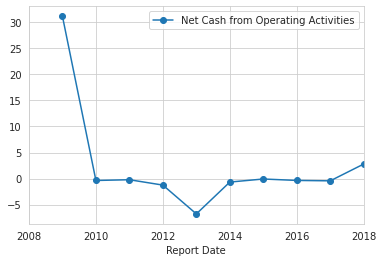

In [ ]:
# Operating Cash or Cash from operating activities
cash = df_cashflow.loc[ticker,	[NET_CASH_OPS]]
print(cash)
cash.plot(grid=True, marker="o")
plt.show()
print(cash.pct_change())
cash.pct_change().plot(grid=True, marker="o")
plt.show()

             Dividends Paid  Total Equity
Report Date                              
2008-12-31              NaN           NaN
2009-12-31              NaN           NaN
2010-12-31              NaN           NaN
2011-12-31              NaN           NaN
2012-12-31              NaN           NaN
2013-12-31              NaN           NaN
2014-12-31              NaN           NaN
2015-12-31              NaN           NaN
2016-12-31              NaN           NaN
2017-12-31              NaN           NaN
2018-12-31              NaN           NaN


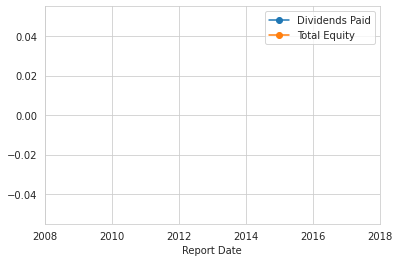

             Dividends Paid  Total Equity
Report Date                              
2008-12-31              NaN           NaN
2009-12-31              NaN           NaN
2010-12-31              NaN           NaN
2011-12-31              NaN           NaN
2012-12-31              NaN           NaN
2013-12-31              NaN           NaN
2014-12-31              NaN           NaN
2015-12-31              NaN           NaN
2016-12-31              NaN           NaN
2017-12-31              NaN           NaN
2018-12-31              NaN           NaN


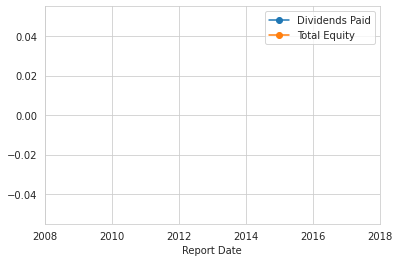

In [ ]:
# Book value or Equity (Assets - Liabilities) + Dividendes (next row)
equity = df_balance.loc[ticker,	[TOTAL_EQUITY]] + df_cashflow.loc[ticker,	[DIVIDENDS_PAID]]
print(equity)
equity.plot(grid=True, marker = "o")
plt.show()

print(equity.pct_change())
equity.pct_change().plot(grid=True, marker = "o")

In [ ]:
#Dividends (shoud sum to equity)
df_cashflow.loc[ticker,	[DIVIDENDS_PAID]].head(10)

,Dividends Paid
Report Date,
2008-12-31,-1.152800e+10
2009-12-31,-4.986300e+10
2010-12-31,-1.762000e+09
2011-12-31,-1.738000e+09
2012-12-31,-1.909000e+09
2013-12-31,-8.138000e+09
2014-12-31,-2.306000e+09
2015-12-31,-3.574000e+09
2016-12-31,-4.194000e+09


Calculate windage
 - Likeliness to continue growing
  This is a
judgment call you’re going to have to make based on your research. You
have to choose what you think is the most likely growth rate going into the
future. Remember, all the numbers you have are in the past and there’s no
guarantee they will continue. Only your understanding of the company will
let you make an educated guess about how much this company will grow



In [ ]:
windage = 0

## Management Numbers
Looking for an **ROE and ROIC at 15%+ or better each year**, for the last **ten years** or so.

**Return on Equiti (ROE) = Net Income / Equity**
 It calculates how many dollars of profit a
company generates with each dollar of shareholder equity, which tells us if
the management is doing a good job with our money

In [ ]:
# Return on Equiti (ROE) = Net Income / Equity
print(iar[NET_INCOME])
print( equity[TOTAL_EQUITY])
a = iar[NET_INCOME] / equity[TOTAL_EQUITY]
print("ROE")
print(a)

Report Date
2008-12-31     4008000000
2009-12-31     6276000000
2010-12-31    -2238000000
2011-12-31     1446000000
2012-12-31     4188000000
2013-12-31    11431000000
2014-12-31     5520000000
2015-12-31    15836000000
2016-12-31    17906000000
2017-12-31    18232000000
2018-12-31    28147000000
Name: Net Income, dtype: int64
Report Date
2008-12-31   NaN
2009-12-31   NaN
2010-12-31   NaN
2011-12-31   NaN
2012-12-31   NaN
2013-12-31   NaN
2014-12-31   NaN
2015-12-31   NaN
2016-12-31   NaN
2017-12-31   NaN
2018-12-31   NaN
Name: Total Equity, dtype: float64
ROE
Report Date
2008-12-31   NaN
2009-12-31   NaN
2010-12-31   NaN
2011-12-31   NaN
2012-12-31   NaN
2013-12-31   NaN
2014-12-31   NaN
2015-12-31   NaN
2016-12-31   NaN
2017-12-31   NaN
2018-12-31   NaN
dtype: float64


**RETURN ON INVESTED CAPITAL (ROIC) = NET INCOME /
(EQUITY + DEBT)**




In [ ]:
# ROIC


**Debt**

Lowest at possible.

To be no more than 2x yearly earning, aka should be able to pay with 1-2 years of earnings

             Long Term Debt
Report Date                
2008-12-31     2.682920e+11
2009-12-31     4.385210e+11
2010-12-31     4.484310e+11
2011-12-31     3.722650e+11
2012-12-31     2.755850e+11
2013-12-31     2.496740e+11
2014-12-31     2.431390e+11
2015-12-31     2.367640e+11
2016-12-31     2.168230e+11
2017-12-31     2.274020e+11
2018-12-31     2.293400e+11


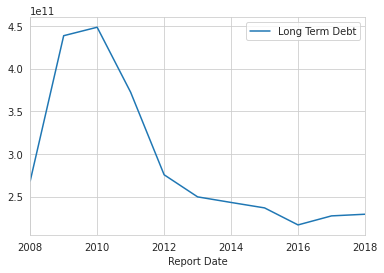

In [ ]:
# Debt
debt = df_balance.loc[ticker, [LT_DEBT]].head(11)
print(debt)
debt.plot(grid=True)
plt.show()